### scikit-learn中的PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=666)

In [4]:
X_train.shape

(1347, 64)

### knn

In [6]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_clf.score(X_test, y_test)

Wall time: 78.3 ms


0.9866666666666667

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [8]:
%%time
knn_clf_2 = KNeighborsClassifier()
knn_clf_2.fit(X_train_reduction, y_train)

knn_clf_2.score(X_test_reduction, y_test)

Wall time: 13.9 ms


0.6066666666666667

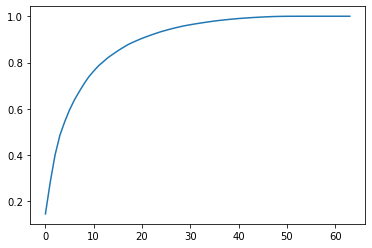

In [11]:
pca = PCA(n_components=64)
pca.fit(X_train)

X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

In [12]:
pca = PCA(0.95)
pca.fit(X_train)

X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [13]:
%%time
knn_clf_3 = KNeighborsClassifier()
knn_clf_3.fit(X_train_reduction, y_train)

knn_clf_3.score(X_test_reduction, y_test)

Wall time: 33.4 ms


0.98

In [14]:
pca = PCA(n_components=2)
pca.fit(x)

X_reduction = pca.transform(x)
X_reduction.shape

(1797, 2)

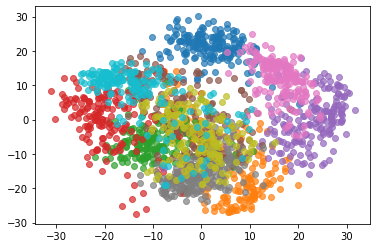

In [22]:
for i in range(10):
    plt.scatter(X_reduction[y==i,0], X_reduction[y==i,1], alpha=0.7)
plt.show()